## Class aggregation

#### Import st_lucas library

In [1]:
# To work with local st_lucas code
# import sys
# sys.path.append('../../')

from st_lucas import LucasRequest, LucasIO, LucasClassAggregate

#### Define request

Request LUCAS points located in the Czech Republic and surveyed in 2018.

In [2]:
from owslib.fes import PropertyIsEqualTo, Or

request = LucasRequest()
request.countries = ['CZ']
request.years = [2018]

#### Download data

In [3]:
lucasio = LucasIO()
lucasio.download(request)

2022-05-10 09:45:49,976 - LUCAS - INFO - io.__init__ - Using owslib version 0.22.0
2022-05-10 09:45:50,230 - LUCAS - INFO - io.download - Connected to https://geoforall.fsv.cvut.cz/st_lucas/geoserver/wfs
2022-05-10 09:45:50,231 - LUCAS - INFO - io.download - Request: {'srsname': 'http://www.opengis.net/gml/srs/epsg.xml#3035', 'typename': 'lucas:lucas_points', 'filter': '<ogc:And xmlns:ogc="http://www.opengis.net/ogc"><ogc:PropertyIsEqualTo><ogc:PropertyName>nuts0</ogc:PropertyName><ogc:Literal>CZ</ogc:Literal></ogc:PropertyIsEqualTo><ogc:PropertyIsEqualTo><ogc:PropertyName>survey_year</ogc:PropertyName><ogc:Literal>2018</ogc:Literal></ogc:PropertyIsEqualTo></ogc:And>'}
2022-05-10 09:45:51,512 - LUCAS - INFO - io.download - Download process successfuly finished. Size of downloaded data: 27370kb


#### Inspect downloaded LUCAS data

In [4]:
df = lucasio.to_geopandas()
df[["point_id","lc1"]]

2022-05-10 09:46:19,897 - numexpr.utils - INFO - utils._init_num_threads - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-05-10 09:46:19,898 - numexpr.utils - INFO - utils._init_num_threads - NumExpr defaulting to 8 threads.


,point_id,lc1
0,48462894,A30
1,46142892,C10
2,48042992,A30
3,46142990,A30
4,45462942,A22
...,...,...
5708,46742866,G11
5709,46123012,A22
5710,47002938,A12
5711,47402970,A11


#### Show statistics

In [5]:
df["lc1"].describe()

count     5713
unique      57
top        E20
freq       990
Name: lc1, dtype: object

<AxesSubplot:ylabel='lc1_l1'>

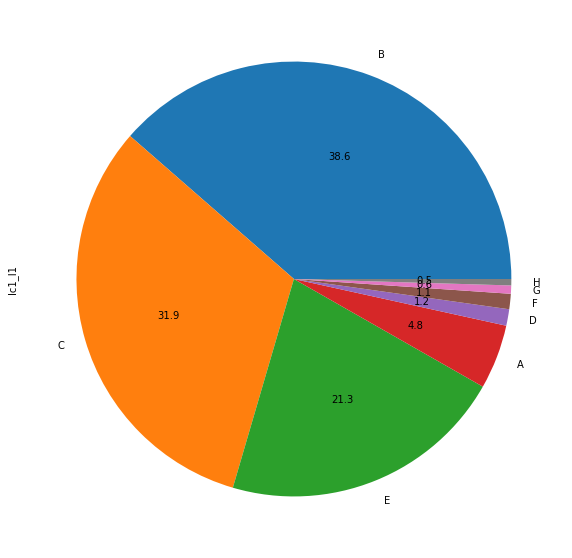

In [6]:
df['lc1_l1'] = df['lc1'].str.slice(0,1)
df['lc1_l1'].value_counts().plot.pie(figsize=(10, 10), autopct="%.1f")

#### Apply aggregation

LUCAS points are by default obtained with information corresponding to LUCAS land cover level 3. With the `LucasClassAggregate` method, you can get information about level 2 or level 1. New column will be added at the end of attribute table.

In [7]:
lc1_to_level1 = {
    "A00": ["A11", "A12", "A13", "A21", "A22", "A30"],
    "B00": ["B11", "B12", "B13", "B14", "B15", "B16", "B17", "B18", "B19", "B21", "B22", "B23", "B31", "B32", "B33", "B34", "B35", "B36", "B37", "B41", "B42", "B43", "B44", "B45", "B51", "B52", "B53", "B54", "B55", "B71", "B72", "B73", "B74", "B75", "B76", "B77", "B81", "B82", "B83", "B84"],
    "Bx1": ["Bx1"],
    "Bx2": ["Bx2"],
    "C00": ["C10", "C21", "C22", "C23", "C31", "C32", "C33"],
    "D00": ["D10", "D20"],
    "E00": ["E10", "E20", "E30"],
    "F00": ["F10", "F20", "F30", "F40"],
    "G00": ["G11", "G12", "G21", "G22", "G30", "G40", "G50"],
    "H00": ["H11", "H12", "H21", "H22", "H23"]
}

lucasaggr = LucasClassAggregate(lucasio.data, mappings=lc1_to_level1)
# lucasaggr = LucasClassAggregate(lucasio.data, mappings_file='aggregation_lc1_h_to_level1.json')
lucasaggr.apply()

Check the appearance of the new column.

In [8]:
df = lucasio.to_geopandas()
df[["lc1_h", "lc1_a"]].head()

,lc1_h,lc1_a
0,A30,A00
1,C10,C00
2,A30,A00
3,A30,A00
4,A22,A00


## Nomenclature translation

Translate the obtained data into CLC2.

In [9]:
from st_lucas import LucasClassTranslate

lucastrans = LucasClassTranslate(lucasio.data)
lucastrans.set_translations("CLC2")
lucastrans.apply()

Check the appearance of the new column.

In [10]:
df = lucasio.to_geopandas()
df[["lc1_h", "lu1_h", "clc2"]].head()

,lc1_h,lu1_h,clc2
0,A30,U319,99
1,C10,U120,31
2,A30,U319,99
3,A30,U319,99
4,A22,U312,12
